In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/Users/jacobfrancis/dev/csc180/csv/HR_comma_sep.csv")

In [4]:
df.head()
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
corr = df.corr(numeric_only=True)
print(corr['left'].sort_values(ascending=False))

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64


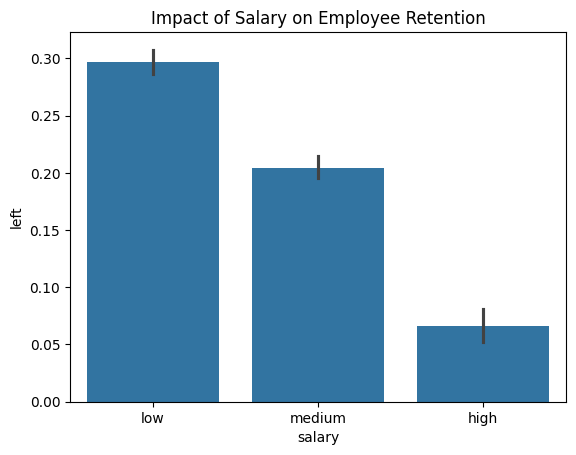

In [6]:
sns.barplot(x='salary', y='left', data=df)
plt.title('Impact of Salary on Employee Retention')
plt.show()

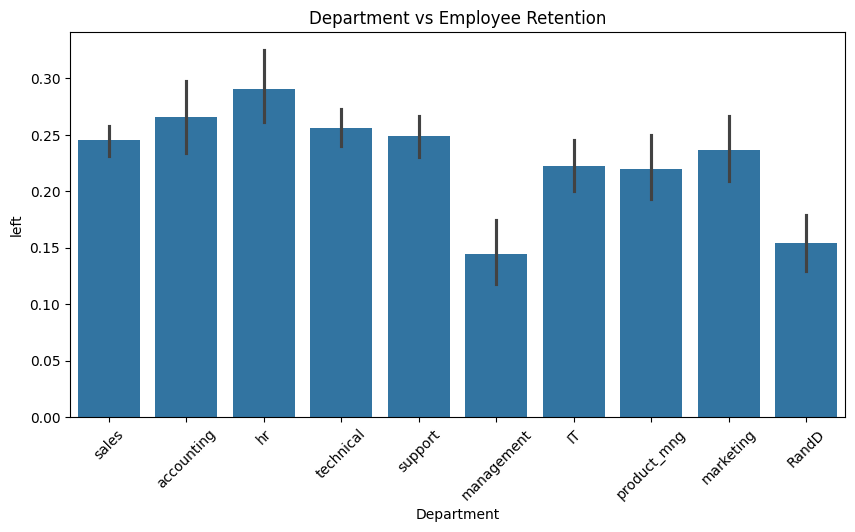

In [7]:
plt.figure(figsize=(10,5))
sns.barplot(x='Department', y='left', data=df)
plt.title('Department vs Employee Retention')
plt.xticks(rotation=45)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])
df['Department'] = le.fit_transform(df['Department'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
X = df[['satisfaction_level', 'average_montly_hours', 'time_spend_company', 'salary']]
y = df['left']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [14]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.75


In [15]:
# Example: low satisfaction, 200 hours, 3 years, low salary
model.predict_proba([[0.4, 200, 3, 0]])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.66970938, 0.33029062]])